In [2]:
import pandas as pd
import numpy as np
import os

In [2]:
df_prods=pd.read_csv(r"C:\Users\justi\Downloads\4.3_orders_products (1)\products.csv", index_col=False)

In [3]:
df_prods=pd.read_csv(r"C:\Users\justi\Downloads\4.3_orders_products (1)\products.csv", index_col=False)

In [4]:
df_ords=pd.read_csv(r"C:\Users\justi\02-24 Instacart Basket Analysis\02 Data\Prepared Data\orders_wrangled.csv", index_col=False)

In [5]:
df_ords.describe()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710541e+06,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552705e+05,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710541e+06,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421082e+06,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [6]:
#create a test dataframe
df_test=pd.DataFrame()

In [7]:
#create a mixed type column
df_test['mix'] = ['a','b',1,True]

In [8]:
df_test.head()

,mix
0,a
1,b
2,1
3,True


In [9]:
#Check for mixed types

for col in df_test.columns.tolist():
  weird = (df_test[[col]].map(type) != df_test[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_test[weird]) > 0:
    print (col)

mix


In [10]:
df_test['mix']=df_test['mix'].astype('str')

In [11]:
#checking for missing values
df_prods.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [12]:
df_nan = df_prods[df_prods['product_name'].isnull()==True]

In [13]:
df_nan

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


In [14]:
df_prods.shape

(49693, 5)

In [15]:
#remove nan 
df_prods_clean=df_prods[df_prods['product_name'].isnull()==False]

In [16]:
df_prods.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


<Axes: >

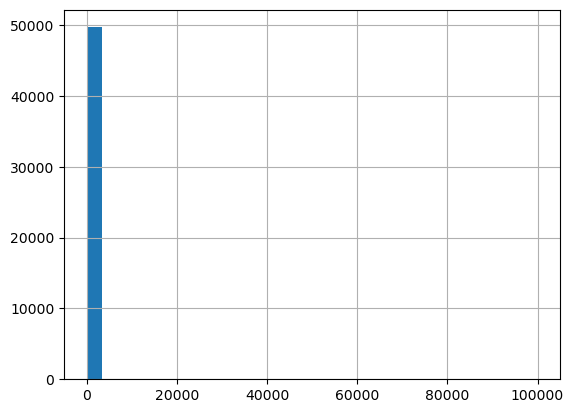

In [17]:
df_prods.prices.hist(bins=30)

In [18]:
df_prods.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


In [19]:
df_prods=df_prods[df_prods['prices']<1000]

In [20]:
df_prods_clean.shape

(49677, 5)

In [21]:
#Checking for dupilcates
df_dups=df_prods_clean[df_prods_clean.duplicated()]

In [22]:
df_dups

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


In [23]:
#Address Duplicates

In [24]:
#Check current number of rows in df to compare after removing duplicates
df_prods_clean.shape

(49677, 5)

In [25]:
#create new df excluding duplicates.
df_prods_clean_no_dups = df_prods_clean.drop_duplicates()

In [26]:
df_prods_clean_no_dups.shape

(49672, 5)

In [27]:
path = r"C:\Users\justi\02-24 Instacart Basket Analysis"

In [28]:
df_prods_clean_no_dups.to_csv(os.path.join(path, '02 Data','Prepared Data', 'products_checked.csv'))

# 4.5 Task

In [29]:
# 2.Run the df.describe() function on your df_ords dataframe. Using your new knowledge about how to interpret the output of this function, share in a markdown cell whether anything about the data looks off or should be investigated further.

df_ords.describe()

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710541e+06,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552705e+05,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710541e+06,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421082e+06,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


To my understanding I don't see anything wrong. 'orders_day_of_week' are between 0 and 6 and there are no negatives. Also in 'hour_of_order' there are no numbers higher than 24 or negatives. Lastley in 'days_since_prior_order' there are no negative numbers.

In [30]:
#3.Check for mixed-type data in your df_ords dataframe

for col in df_ords.columns.tolist():
  weird = (df_ords[[col]].map(type) != df_ords[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_ords[weird]) > 0:
    print (col)

No mixed-type data

In [31]:
#Run a check for missing values in your df_ords dataframe.
df_ords.isnull().sum()

Unnamed: 0                     0
order_id                       0
user_id                        0
order_number                   0
orders_day_of_week             0
hour_of_order                  0
days_since_prior_order    206209
dtype: int64

This shows that there are 206,209 missing values for 'days_since_prior_order'. This is likely because these are one time customers.

In [32]:
df_nan = df_ords[df_ords['days_since_prior_order'].isnull()==True]

In [33]:
df_nan

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order
0,0,2539329,1,1,2,8,NaN
11,11,2168274,2,1,2,11,NaN
26,26,1374495,3,1,1,14,NaN
39,39,3343014,4,1,6,11,NaN
45,45,2717275,5,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,3420930,969311,206205,1,4,12,NaN
3420934,3420934,3189322,206206,1,3,18,NaN
3421002,3421002,2166133,206207,1,6,19,NaN
3421019,3421019,2227043,206208,1,1,15,NaN


In [34]:
df_ords.shape

(3421083, 7)

In [35]:
df_ords_clean=df_ords[df_ords['days_since_prior_order'].isnull()==False]

In [36]:
df_ords_clean.shape

(3214874, 7)

Doing this shows that the 206,209 rows of unnecessary data have been removed. (3,421,083-206,209=3,214,874)

In [37]:
df_dups=df_ords_clean[df_ords_clean.duplicated()]

In [38]:
df_dups

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order


There are no duplicates in this data frame

In [39]:
df_ords_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_checked.csv'))

In [4]:
df_prods_prior=pd.read_csv(r"C:\Users\justi\02-24 Instacart Basket Analysis\02 Data\Original Data\orders_products_prior.csv", index_col=False)

In [5]:
df_prods_prior.shape

(32434489, 4)

In [8]:
df_customers=pd.read_csv(r"C:\Users\justi\02-24 Instacart Basket Analysis\02 Data\Original Data\customers data set\customers.csv", index_col=False)

In [9]:
df_customers.shape

(206209, 10)

In [ ]:
44721